In [1]:
pip install ipython-sql

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install SQLAlchemy

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext sql

In [4]:
%sql sqlite:///attr_data.db

In [5]:
%%sql 

sqlite:///attr_data.db

In [6]:
%%sql
SELECT *
FROM sqlite_master

 * sqlite:///attr_data.db
Done.


type,name,tbl_name,rootpage,sql
table,attrition_records,attrition_records,2,"CREATE TABLE attrition_records ( id INTEGER PRIMARY KEY AUTOINCREMENT, Age INT, Attrition TEXT, BusinessTravel TEXT, DailyRate INT, Department TEXT, DistanceFromHome INT, Education INT, EducationField TEXT, EmployeeCount INT, EmployeeNumber INT, EnvironmentSatisfaction, Gender TEXT, HourlyRate INT, JobInvolvement INT, JobLevel INT, JobRole TEXT, JobSatisfaction INT, MaritalStatus TEXT, MonthlyIncome INT, MonthlyRate INT, NumCompaniesWorked INT, Over18 TEXT, OverTime TEXT, PercentSalaryHike INT, PerformanceRating INT, RelationshipSatisfaction INT, StandardHours INT, StockOptionLevel INT, TotalWorkingYears INT, TrainingTimesLastYear INT, WorkLifeBalance INT, YearsAtCompany INT, YearsInCurrentRole INT, YearsSinceLastPromotion INT, YearsWithCurrManager INT )"
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [7]:
#Import neccessary libaries.
import sqlite3
import pandas as pd
import sqlalchemy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
attrition_data = sqlalchemy.create_engine('sqlite:///attr_data.db')

In [9]:
pd.read_sql('attrition_records',attrition_data)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [10]:
# importing data into pandas dataframe
df_Ibm_data = pd.read_sql('attrition_records',attrition_data)
df_Ibm_data.head()


,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [11]:
df_Ibm_data.shape

(1470, 36)

In [12]:
# columns in dataset
df_Ibm_data.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
#dropping some columns that might not have influence to employees attrition
columns = ["id"]
df_Ibm_data.drop(columns, inplace = True, axis=1)

In [14]:
df_Ibm_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [15]:
# check forr NaN Values
df_Ibm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [16]:
# mapping
df_Ibm_data["Attrition"] = np.where(df_Ibm_data["Attrition"] == "Yes",1,0)
df_Ibm_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
# duplicated data
df_Ibm_data.duplicated().sum()

0

In [18]:
# data cleaning
df_Ibm_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [19]:
# checking for duplicates in the dataset
df_Ibm_data.duplicated().sum()

0

In [20]:
# Data description for all numeric fields
df_Ibm_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
# Data description for all columns
df_Ibm_data.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,0.161224,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [22]:
def numericalvariables(df,segment_by,variable = "Attrition"):
    fig, ax = plt.subplots(ncols = 2, figsize = (14,6))
    sns.boxplot(x = variable, y = segment_by, data=df_Ibm_data, ax=ax[0])
    ax[0].set_title("Graph of " + segment_by + " vs " + variable)
    
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)

In [23]:
def categoricalvariable(df, segment_by,invert_axis = False, variable = "left"):
    fig, ax = plt.subplots(ncols = 2, figsize = (14,6))
    if invert_axis== False:
        sns.countplot(x = segment_by, data=df_Ibm_data, hue="Attrition", ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df_Ibm_data, hue="Attrition", ax=ax[0])
    
    ax[0].set_title("Graph of " + segment_by + " vs " + "Attrition")
    
    if invert_axis== False:
        sns.barplot(x = segment_by, y = variable ,data=df_Ibm_data,ci=None)
    else:
        sns.barplot(y = segment_by, x = variable ,data=df_Ibm_data,ci=None)
        
        
    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()
    
     

In [24]:
cat_col = [col for col in df_Ibm_data.columns if df_Ibm_data[col].dtype == 'O']
num_col = [col for col in df_Ibm_data.columns if df_Ibm_data[col].dtype != 'O']

In [25]:
df_Ibm_data[cat_col].head()


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [26]:
df_Ibm_data[num_col].head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


# univariate analysis and data visualization
## distribution of all numerical variable

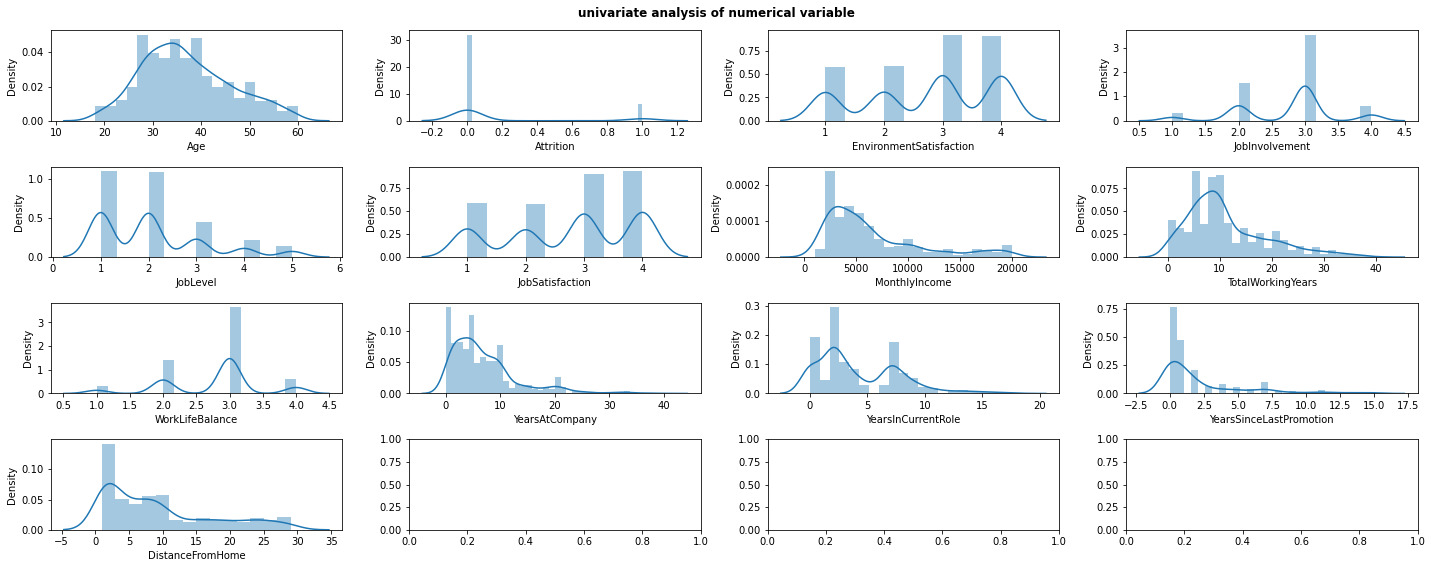

In [27]:
fig,ax = plt.subplots(4,4, figsize=(20,8))
plt.suptitle('univariate analysis of numerical variable', fontweight="bold")
sns.distplot(df_Ibm_data['TotalWorkingYears'], ax =ax[1,3])
sns.distplot(df_Ibm_data['MonthlyIncome'], ax =ax[1,2])
sns.distplot(df_Ibm_data['YearsAtCompany'], ax =ax[2,1])
sns.distplot(df_Ibm_data['DistanceFromHome'], ax =ax[3,0])
sns.distplot(df_Ibm_data['YearsInCurrentRole'], ax =ax[2,2])
sns.distplot(df_Ibm_data['YearsSinceLastPromotion'], ax =ax[2,3])
sns.distplot(df_Ibm_data['WorkLifeBalance'], ax =ax[2,0])
sns.distplot(df_Ibm_data['JobSatisfaction'], ax =ax[1,1])
sns.distplot(df_Ibm_data['Age'], ax =ax[0,0])
sns.distplot(df_Ibm_data['Attrition'], ax =ax[0,1])
sns.distplot(df_Ibm_data['EnvironmentSatisfaction'], ax =ax[0,2])
sns.distplot(df_Ibm_data['JobInvolvement'], ax =ax[0,3])
sns.distplot(df_Ibm_data['JobLevel'], ax =ax[1,0])
plt.tight_layout();

insights:

1) most of the employees lives near the company.
2) the median age of employees is between 30-40years.
3) attrition has more 0(No)which means no attrition than 1(Yes) means there is attrition.
4) most employees do not spend more than 10yrs in the company.
5) a large number of employees got promotion recently.

## distribution of all categorical variable

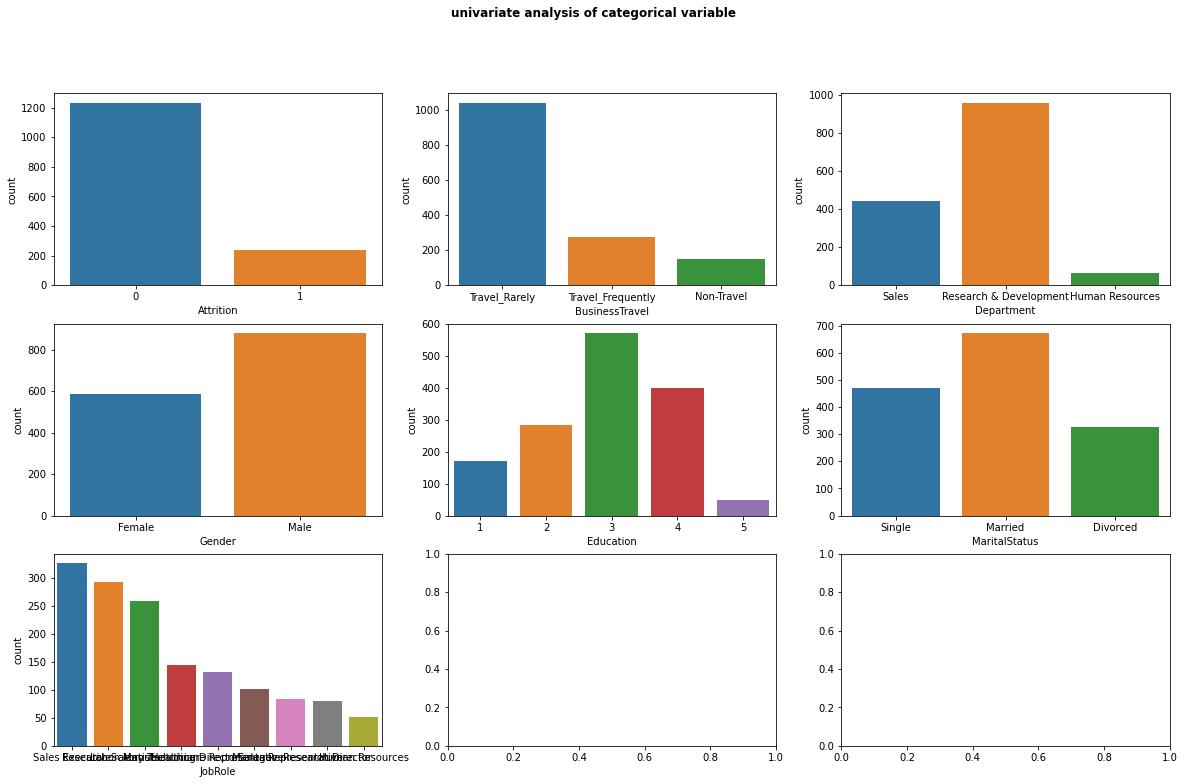

In [28]:
# frequency distribution of all categorical variables.
fig, axes = plt.subplots(3,3, figsize=(20,12))
plt.suptitle('univariate analysis of categorical variable', fontweight="bold")
sns.countplot("Attrition", data=df_Ibm_data, ax=axes[0,0])
sns.countplot("BusinessTravel", data=df_Ibm_data, ax=axes[0,1])
sns.countplot("Department", data=df_Ibm_data, ax=axes[0,2])
sns.countplot("Gender", data=df_Ibm_data, ax=axes[1,0])
sns.countplot("Education", data=df_Ibm_data, ax=axes[1,1])
sns.countplot("MaritalStatus", data=df_Ibm_data, ax=axes[1,2])
sns.countplot("JobRole", data=df_Ibm_data, ax=axes[2,0]);

insights

1) most of the employees rarely travel, about 1/4th of the employees travel frequently.
2) most of the employees are in research & development field.
3) the ratio of male to female is not bad using gender equality of women participation to labour force.
4) most of the married employees do not do overtime but more than half of the single employees do overtime since they are not married.

<AxesSubplot:>

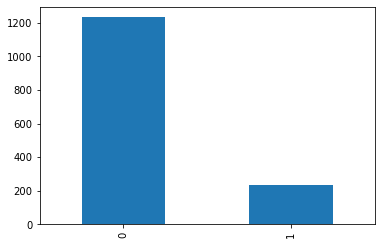

In [29]:
df_Ibm_data['Attrition'].value_counts().sort_index().plot.bar()

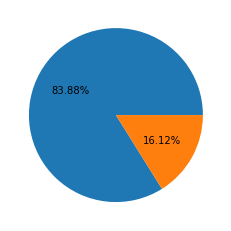

In [30]:
freq = df_Ibm_data.Attrition.value_counts(normalize=True)
Attrition = df_Ibm_data.Attrition.unique()
plt.pie(freq, autopct='%.2f%%');

In [31]:
#calculate the percentage of performance rating per category in the whole dataset
round(df_Ibm_data['Attrition'].value_counts()/df_Ibm_data.shape[0] * 100,2)

0    83.88
1    16.12
Name: Attrition, dtype: float64

In [32]:
# data correlation
# data_correlation = df_Ibm_data.corr("pearson")
data_correlation = df_Ibm_data.corr()

In [33]:
data_correlation['Attrition'].sort_values(ascending=True)

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
DistanceFromHome            0.077924
Attrition                   1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

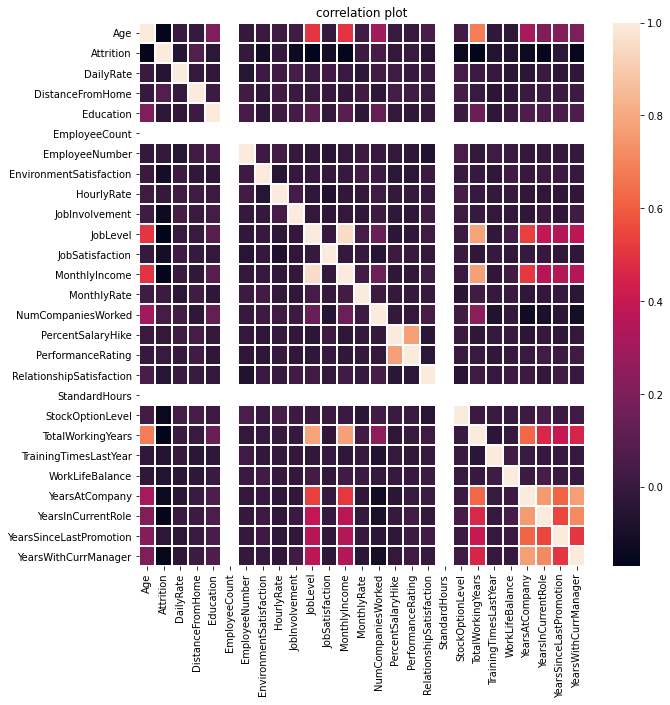

In [34]:
corr = df_Ibm_data.corr()
plt.figure(figsize = (10,10))
plt.title('correlation plot')
sns.heatmap(corr, linewidth = 1);


In [35]:
#dropping some columns that might not have influence to employees attrition
columns = ["StandardHours","EmployeeCount"]
df_Ibm_data.drop(columns, inplace = True, axis=1)

In [36]:
# corr = df_Ibm_data.corr()
# plt.figure(figsize = (10,10))
# sns.heatmap(corr, linewidth = 1)

insights

1) Age, job level and monthly income are highly corellated with total working years.

In [37]:
df_Ibm_data = df_Ibm_data.copy(deep=True)
df_Ibm_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [38]:
# plt.figure(figsize=[13,13])
# sns.heatmap(data_correlation, xticklabels = data_correlation.columns, yticklabels = data_correlation.columns)

## 3) Effect of age on Attrition

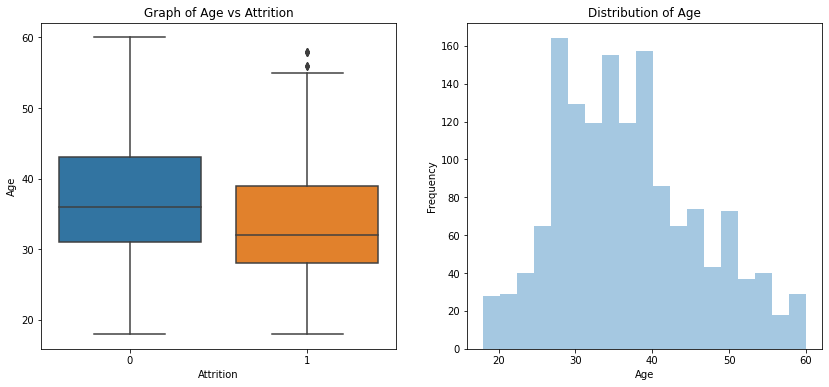

In [39]:
# relationship between employees age with attrition
numericalvariables(df_Ibm_data,segment_by="Age")

In [40]:
#numericalvariables(df_Ibm_data,segment_by="MonthlyIncome")
# numericalvariables(df_Ibm_data,segment_by="TotalWorkingYears")
# numericalvariables(df_Ibm_data,segment_by="YearsAtCompany")
# numericalvariables(df_Ibm_data,segment_by="DistanceFromHome")
# numericalvariables(df_Ibm_data,segment_by="YearsInCurrentRole")
# numericalvariables(df_Ibm_data,segment_by="YearsSinceLastPromotion")
# numericalvariables(df_Ibm_data,segment_by="WorkLifeBalance")
# numericalvariables(df_Ibm_data,segment_by="JobSatisfaction")
# numericalvariables(df_Ibm_data,segment_by="Age")
# numericalvariables(df_Ibm_data,segment_by="EnvironmentSatisfaction")
# numericalvariables(df_Ibm_data,segment_by="JobInvolvement")
# numericalvariables(df_Ibm_data,segment_by="JobLevel")



## department

In [41]:
df_Ibm_data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [42]:
round(df_Ibm_data.Department.value_counts()/df_Ibm_data.shape[0] * 100,2 )

Research & Development    65.37
Sales                     30.34
Human Resources            4.29
Name: Department, dtype: float64

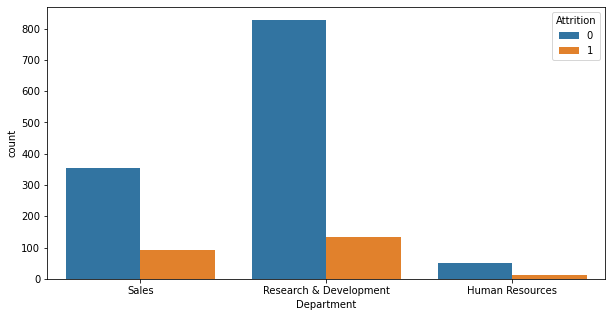

In [43]:
# impact of Department to the overall attrition rate
fig, (ax1) = plt.subplots(1, figsize=(10,5))
ax = sns.countplot(x= "Department", hue = "Attrition", data=df_Ibm_data, ax=ax1)



insights:

1)most of the employees in department do not want to leave the the company
2)most employees in the Research & Development department do not want to leave the company which amount to about(65%) similarly to sales and Human Resources department of about (30% and 4.29%)respectively.


## Gender

In [44]:
df_Ibm_data.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [45]:
round(df_Ibm_data.Gender.value_counts()/df_Ibm_data.shape[0] * 100,2 )

Male      60.0
Female    40.0
Name: Gender, dtype: float64

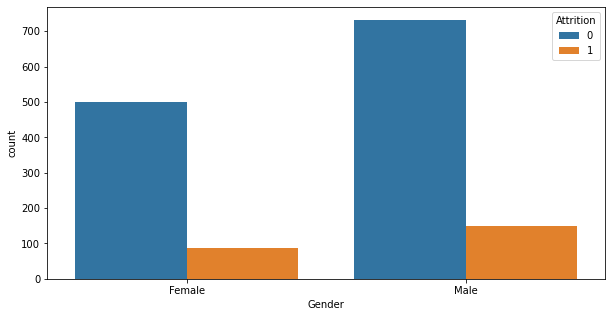

In [46]:
# impact of Department to the overall attrition rate
fig, (ax1) = plt.subplots(1, figsize=(10,5))
ax = sns.countplot(x= "Gender", hue = "Attrition", data=df_Ibm_data, ax=ax1)



## BusinessTravel

In [47]:
df_Ibm_data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [48]:
round(df_Ibm_data.BusinessTravel.value_counts()/df_Ibm_data.shape[0] * 100,2 )

Travel_Rarely        70.95
Travel_Frequently    18.84
Non-Travel           10.20
Name: BusinessTravel, dtype: float64

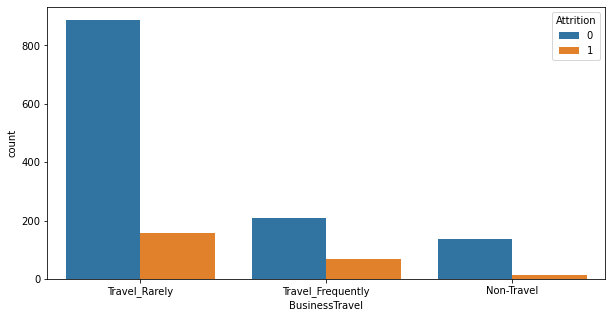

In [49]:
# impact of Department to the overall attrition rate
fig, (ax1) = plt.subplots(1, figsize=(10,5))
ax = sns.countplot(x= "BusinessTravel", hue = "Attrition", data=df_Ibm_data, ax=ax1)



## Education

In [50]:
df_Ibm_data.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [51]:
round(df_Ibm_data.Education.value_counts()/df_Ibm_data.shape[0] * 100,2 )

3    38.91
4    27.07
2    19.18
1    11.56
5     3.27
Name: Education, dtype: float64

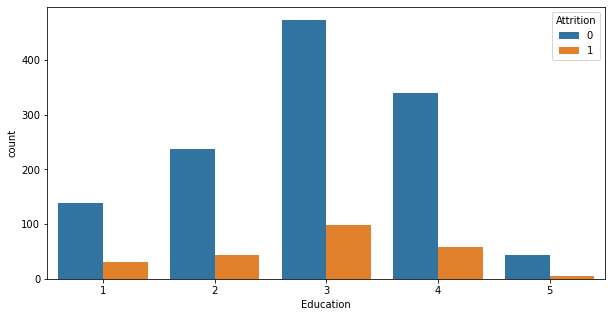

In [52]:
# impact of work-life balance to the overall attrition rate
fig, (ax1) = plt.subplots(1, figsize=(10,5))
ax = sns.countplot(x= "Education", hue = "Attrition", data=df_Ibm_data, ax=ax1)



## 5) worklife balance

In [53]:
df_Ibm_data.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [54]:
round(df_Ibm_data.WorkLifeBalance.value_counts()/df_Ibm_data.shape[0] * 100,2 )

3    60.75
2    23.40
4    10.41
1     5.44
Name: WorkLifeBalance, dtype: float64

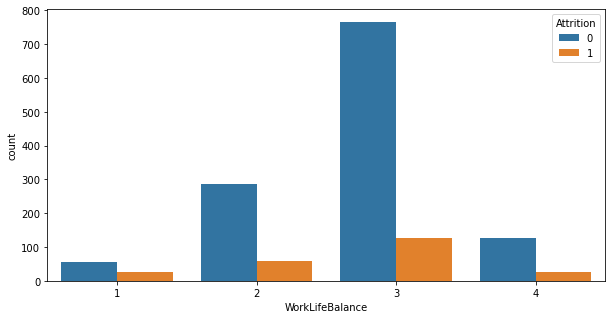

In [55]:
# impact of work-life balance to the overall attrition rate
fig, (ax1) = plt.subplots(1, figsize=(10,5))
ax = sns.countplot(x= "WorkLifeBalance", hue = "Attrition", data=df_Ibm_data, ax=ax1)



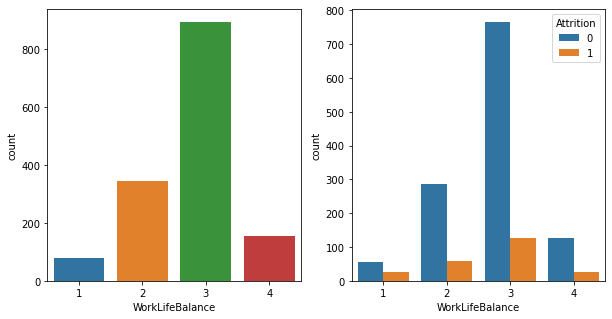

In [56]:
# impact of work-life balance to the overall attrition rate
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax = sns.countplot(x= "WorkLifeBalance", data=df_Ibm_data, ax=ax1)
ax = sns.countplot(x= "WorkLifeBalance", hue = "Attrition", data=df_Ibm_data, ax=ax2)

insights
1) most employees have above average(60.75%)work life balance(3)  while very few employees(5%) practice poor work life balance(1).
2) from the plot we can deduce that most employees with good work life balance(3,2,4) do not leave the company while those with poor work life balance tends to leave the company

## 2) Relationship between Education and Monthly income

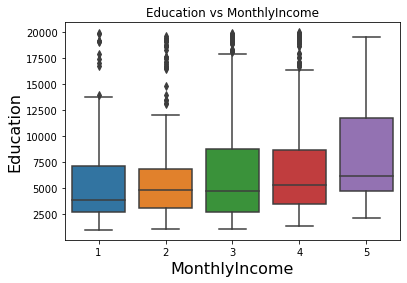

In [57]:
sns.boxplot(df_Ibm_data['Education'], df_Ibm_data["MonthlyIncome"])
plt.title('Education vs MonthlyIncome')
plt.xlabel('MonthlyIncome', fontsize = '16')
plt.ylabel('Education', fontsize = '16');

findfont: Font family ['20'] not found. Falling back to DejaVu Sans.


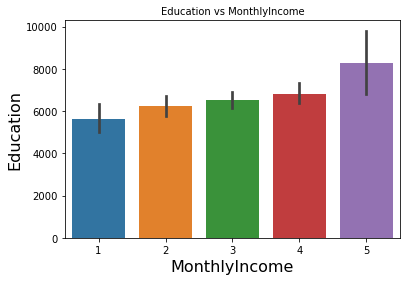

In [58]:
sns.barplot(df_Ibm_data['Education'], df_Ibm_data["MonthlyIncome"])
plt.title('Education vs MonthlyIncome', font = '20')
plt.xlabel('MonthlyIncome', fontsize = '16')
plt.ylabel('Education', fontsize = '16');

<AxesSubplot:title={'center':'Bar plot of Education and Monthly Income'}, xlabel='Education', ylabel='MonthlyIncome'>

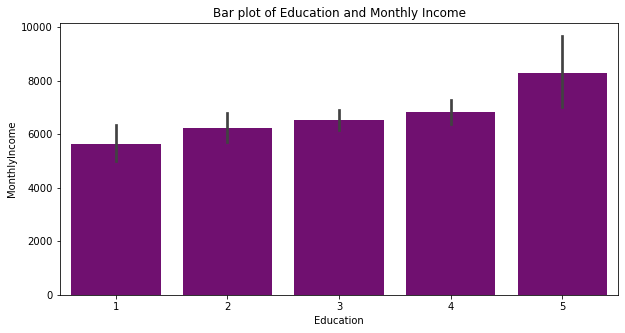

In [59]:
fig, (ax1) = plt.subplots(1, figsize=(10,5))
plt.title('Bar plot of Education and Monthly Income')
sns.barplot(data = df_Ibm_data, x = 'Education', y ='MonthlyIncome', color = 'purple')

## 4) checking if monthly income is the main factor in employee attrition

In [60]:
df_Ibm_data[['MonthlyIncome', 'Attrition',]].groupby(["Attrition"]).describe()

MonthlyIncome                                                    \
                  count         mean          std     min     25%     50%   
Attrition                                                                   
0                1233.0  6832.739659  4818.208001  1051.0  3211.0  5204.0   
1                 237.0  4787.092827  3640.210367  1009.0  2373.0  3202.0   

                            
              75%      max  
Attrition                   
0          8834.0  19999.0  
1          5916.0  19859.0

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

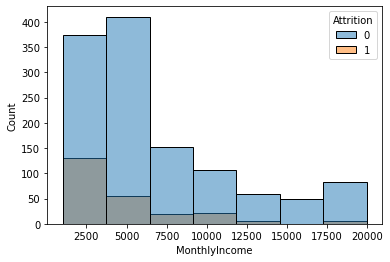

In [61]:
sns.histplot(data = df_Ibm_data, x = "MonthlyIncome", hue = "Attrition", bins = 7)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

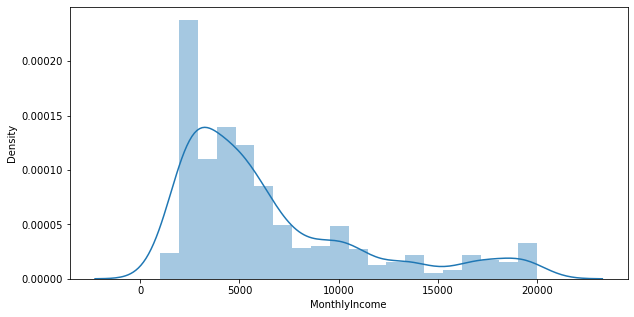

In [62]:
# is monthly income the main factor in employee attritionn
fig, (ax1) = plt.subplots(1, figsize=(10,5))
sns.distplot(df_Ibm_data['MonthlyIncome'], ax =ax1)


insights:

from the of monthly income it can be seen that people with low monthly income have a higher probability of attrition especially when the monthly income is very less because from the plot it is seen that income greater than 5000 employees tends not leave the company